In [1]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")
from datasets import load_dataset

There are 72157 datasets currently available on the Hub
The first 10 are: ['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [2]:
emotions = load_dataset("SetFit/emotion")
train_ds = emotions["train"]

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/SetFit--emotion-89147fdf376d67e2/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
print(train_ds)
print(train_ds.features)

Dataset({
    features: ['text', 'label', 'label_text'],
    num_rows: 16000
})
{'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None), 'label_text': Value(dtype='string', id=None)}


In [4]:
train_ds[:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3],
 'label_text': ['sadness', 'sadness', 'anger', 'love', 'anger']}

In [5]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label,label_text
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


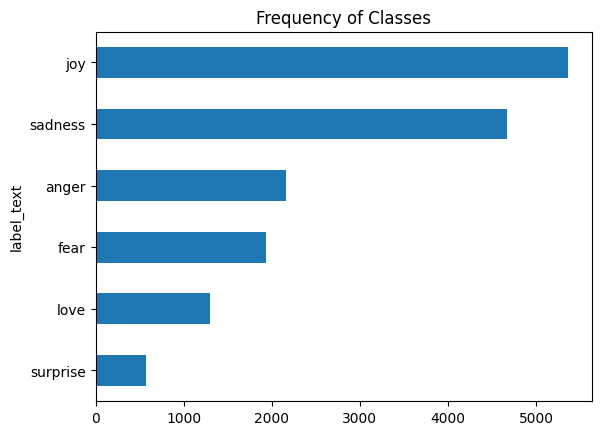

In [6]:
import matplotlib.pyplot as plt

df["label_text"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [7]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
print(df["Words Per Tweet"])

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: Words Per Tweet, Length: 16000, dtype: int64


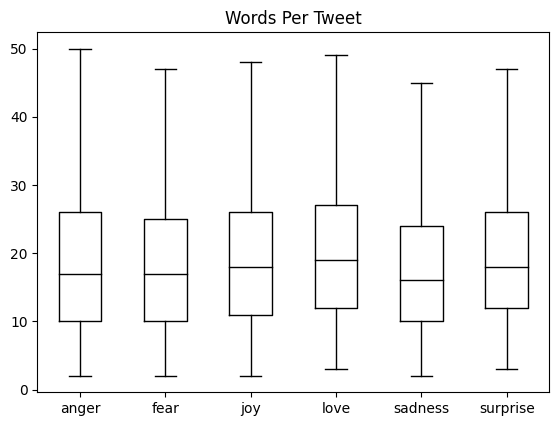

In [8]:
df.boxplot("Words Per Tweet", by="label_text", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [9]:
emotions.reset_format()

### Character Tokenization

In [10]:
text = """Tokenizing text is a core task of NLP. Character Tokenization is feeding each character individually to the model.
       character-level tokenization ignores any structure in the text and treats the whole string as a stream of characters.
       the main drawback is that linguistic structures such as words need to be learned from the data.
       """
tokenized_text = list(text)
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
input_ids = [token2idx[token] for token in tokenized_text]

import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([350, 32])

In [11]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 8
One-hot: tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])


### Word Tokenization

In [12]:
tokenized_text = text.split()
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
input_ids = [token2idx[token] for token in tokenized_text]
input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: Tokenizing
Tensor index: 3
One-hot: tensor([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


### WordPiece - Subword Tokenization

Makes it easier for a model to handle rare and complex words by breaking them into smaller, more manageable components, while keeping frequent words intact

In [13]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [14]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 2839, 19204, 3989, 2003, 8521, 2169, 2839, 14258, 2000, 1996, 2944, 1012, 2839, 1011, 2504, 19204, 3989, 26663, 2151, 3252, 1999, 1996, 3793, 1998, 18452, 1996, 2878, 5164, 2004, 1037, 5460, 1997, 3494, 1012, 1996, 2364, 4009, 5963, 2003, 2008, 12158, 5090, 2107, 2004, 2616, 2342, 2000, 2022, 4342, 2013, 1996, 2951, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [15]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)
# [CLS] and [SEP] tokens have been added to the start and end of the sequence.
# to indicate the start and end of a sequence.

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', 'character', 'token', '##ization', 'is', 'feeding', 'each', 'character', 'individually', 'to', 'the', 'model', '.', 'character', '-', 'level', 'token', '##ization', 'ignores', 'any', 'structure', 'in', 'the', 'text', 'and', 'treats', 'the', 'whole', 'string', 'as', 'a', 'stream', 'of', 'characters', '.', 'the', 'main', 'draw', '##back', 'is', 'that', 'linguistic', 'structures', 'such', 'as', 'words', 'need', 'to', 'be', 'learned', 'from', 'the', 'data', '.', '[SEP]']


In [16]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. character tokenization is feeding each character individually to the model. character - level tokenization ignores any structure in the text and treats the whole string as a stream of characters. the main drawback is that linguistic structures such as words need to be learned from the data. [SEP]


In [17]:
print(tokenizer.model_max_length)
print(tokenizer.vocab_size)
print(tokenizer.model_input_names)

512
30522
['input_ids', 'attention_mask']


In [18]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

####  The attention mask allows the model to ignore the padded parts of the input.
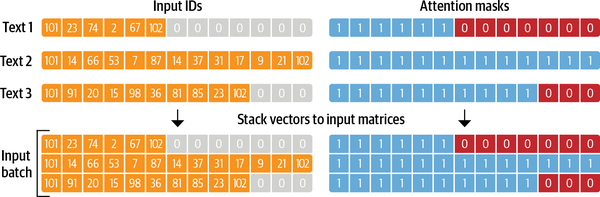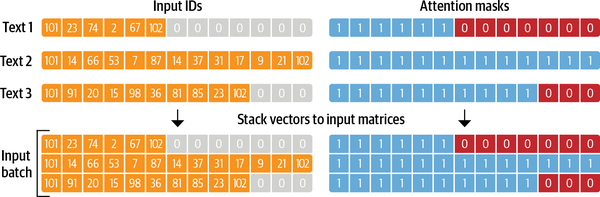

In [19]:
for x, y in zip(tokenize(emotions["train"][:5])['input_ids'], tokenize(emotions["train"][:5])['attention_mask']):
    print(f"Input IDs: {x}\nAttention Mask: {y}\n")

Input IDs: [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Input IDs: [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Input IDs: [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Input IDs: [101, 1045, 2572, 2412, 3110, 16839, 9080, 12863, 2055, 1996, 13788, 1045, 2097, 2113, 2008, 2009, 2003, 2145, 2006, 1996, 3200, 102, 0]
Attention Mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

Input IDs: [101, 1045, 2572, 3110, 24665, 7140, 11714, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Attention Mask: [1, 1, 1, 1, 1

In [20]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [21]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [22]:
print(emotions["train"].column_names)
print(emotions_encoded["train"].column_names)

['text', 'label', 'label_text']
['text', 'label', 'label_text', 'input_ids', 'attention_mask']


## feature extractor

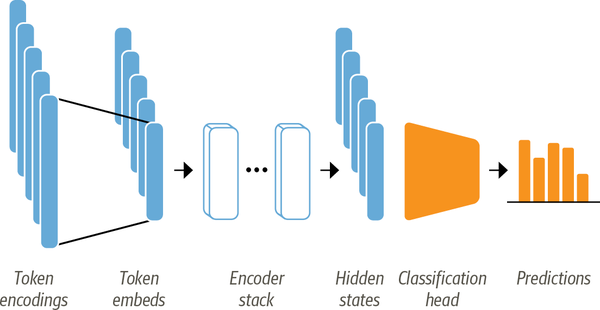
### Hidden state is a vector representation that encodes the input's contextual information

In [23]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [24]:
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 66])


In [25]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.5334, -0.1221, -0.3076,  ..., -0.1572, -0.1654,  0.7014],
         [-1.0507,  0.3588, -0.8993,  ..., -0.4818, -0.2322,  0.4251],
         [-0.5315,  0.0884, -0.4654,  ..., -0.4123, -0.1836,  0.8464],
         ...,
         [-0.1508, -0.1136, -0.1645,  ..., -0.3351, -0.3514,  0.2915],
         [ 0.5901, -0.0313, -0.4497,  ...,  0.4053, -0.6775, -0.3667],
         [-0.4393,  0.0639,  0.0393,  ...,  0.2859, -0.8759,  0.4044]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [26]:
outputs.last_hidden_state.size()

torch.Size([1, 66, 768])

In [27]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [28]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

#### The hidden states associated with each tweet,

In [29]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [30]:
emotions_hidden["train"].column_names

['text', 'label', 'label_text', 'input_ids', 'attention_mask', 'hidden_state']

In [31]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [32]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/opt/conda/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/opt/conda/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

,X,Y,label
0,4.658158,6.447292,0
1,-2.388557,5.501068,0
2,5.639717,2.942311,3
3,-1.677551,3.639935,2
4,-2.815403,3.634567,3


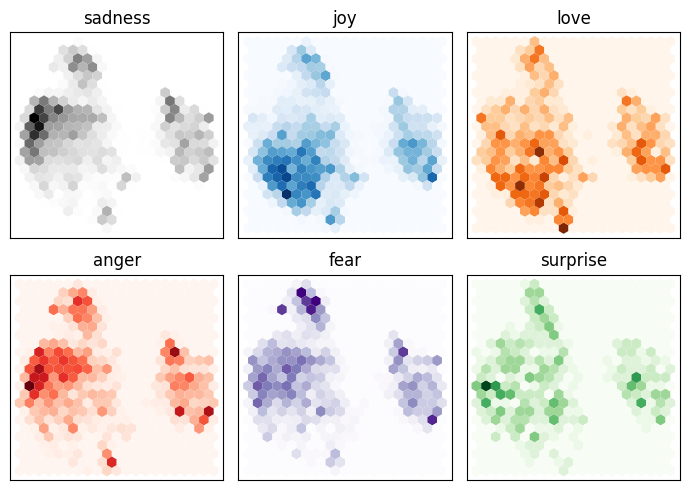

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = [
    'sadness',
    'joy',
    'love',
    'anger',
    'fear',
    'surprise'
]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.634

In [54]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

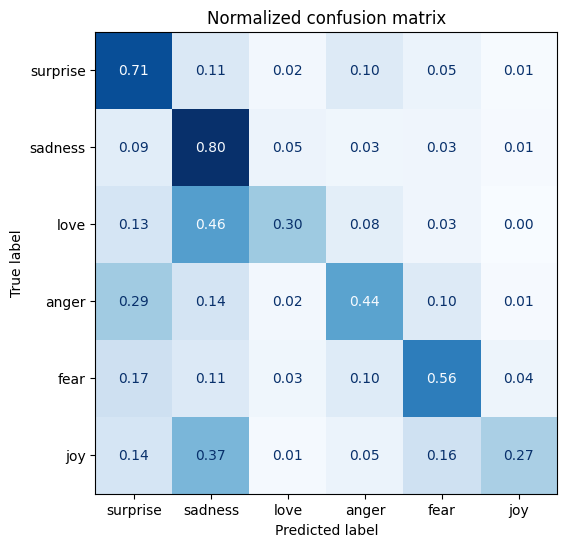

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

## Fine-Tuning Transformers

In [56]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [57]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [58]:
from huggingface_hub import notebook_login

notebook_login()

In [59]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [60]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.554944,0.818500,0.790575
2,0.752500,0.341594,0.905500,0.903863


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [61]:
preds_output = trainer.predict(emotions_encoded["validation"])

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


In [62]:
preds_output.metrics

{'test_loss': 0.3415939211845398,
 'test_accuracy': 0.9055,
 'test_f1': 0.903863413991184,
 'test_runtime': 3.0055,
 'test_samples_per_second': 665.439,
 'test_steps_per_second': 5.324}

In [64]:
y_preds = np.argmax(preds_output.predictions, axis=1)
y_preds

array([0, 0, 2, ..., 1, 2, 1])

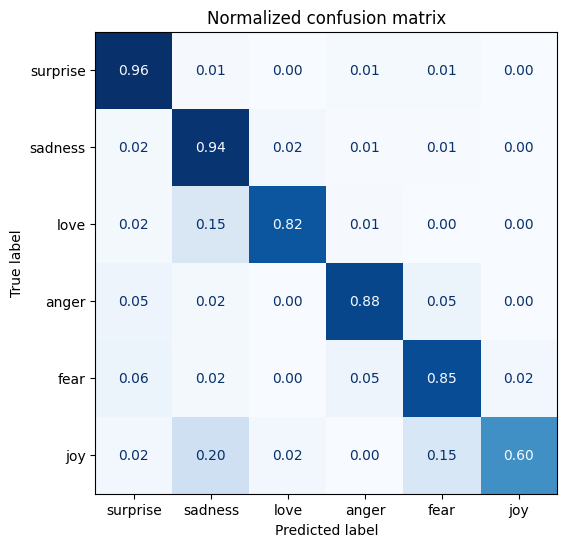

In [65]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [66]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

In [67]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

In [85]:
label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'suprise'
}

emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].map(label_mapping)
df_test["predicted_label"] = df_test["predicted_label"].map(label_mapping)

In [86]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,4.886734
1963,i called myself pro life and voted for perry w...,joy,sadness,4.538623
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.529245
765,i feel super awkward and out of place right now,joy,sadness,4.523812
1274,i am going to several holiday parties and i ca...,joy,sadness,4.502525
1950,i as representative of everything thats wrong ...,suprise,sadness,4.435540
1801,i feel that he was being overshadowed by the s...,love,sadness,4.361589
1870,i guess i feel betrayed because i admired him ...,joy,sadness,4.334354
539,i feel i should say what i want since you are ...,joy,anger,4.144919
1757,i feel like there s a reason to buy another to...,anger,joy,4.062011


In [89]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
69,i have no extra money im worried all of the time and i feel so beyond pathetic,sadness,sadness,0.041978
632,i feel he is an terrific really worth bet,joy,joy,0.042654
1012,i definitely succumbed to pre holiday sales but i feel good going into the holiday season i probably shouldnt say that though,joy,joy,0.043049
222,i am at day and i am feeling terrific,joy,joy,0.043115
1727,i still didnt feel satisfied with and about myself,joy,joy,0.043506
1226,im feeling terrific and in great shape im optimistic that ill heal well and quickly while remaining realistic that im going to feel fairly crap for the first week,joy,joy,0.043668
205,i cannot wait for school to end so i can change into a tank top and shorts and head to the gym and then to release my toxins and stretch and realize that homework is important but feeling good is even better,joy,joy,0.043734
424,i believe everyone can feel energetic after listening,joy,joy,0.043861
1184,im feeling quite optimistic but im still keeping my fingers crossed,joy,joy,0.043881
1303,i feel pathetic and uninspired,sadness,sadness,0.043990


### Saving to huggingface and testing model

In [90]:
trainer.push_to_hub(commit_message="Training completed!")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

'https://huggingface.co/AgneyPraseed/distilbert-base-uncased-finetuned-emotion/tree/main/'

In [91]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [99]:
custom_tweet = "This is my first huggingface model and its only the begining"
preds = classifier(custom_tweet, return_all_scores=True)

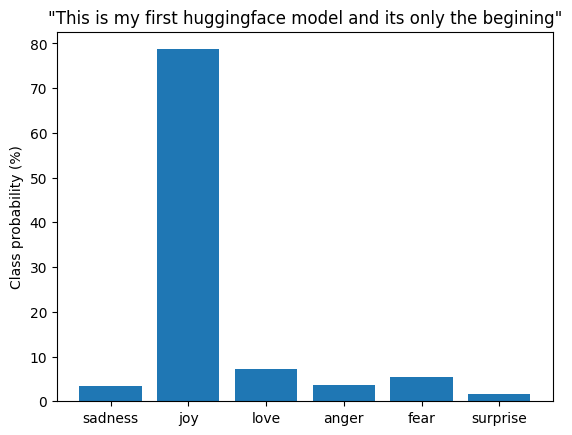

In [100]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()